In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as ke
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Add new axis to make the images in dataset to grayscale
x_train = x_train[..., np.newaxis] / 255.0
x_test = x_test[..., np.newaxis] / 255.0

# Convert the images to categories
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Modify the images 
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(x_train)

In [3]:
# RNN model along with Dropout Layer and Batch Normalization
model = Sequential([
    SimpleRNN(256, input_shape=(28, 28), activation='relu'),
    BatchNormalization(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),

    Dense(64, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),

    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

f:\Softwares\VirtualEnv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=3, validation_data=(x_test, y_test))

f:\Softwares\VirtualEnv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 38ms/step - accuracy: 0.3861 - loss: 1.7769 - val_accuracy: 0.7978 - val_loss: 0.5649
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.7794 - loss: 0.7094 - val_accuracy: 0.9177 - val_loss: 0.2854
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.8656 - loss: 0.5117 - val_accuracy: 0.9411 - val_loss: 0.2351


In [5]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9298 - loss: 0.2758


[0.23506733775138855, 0.941100001335144]

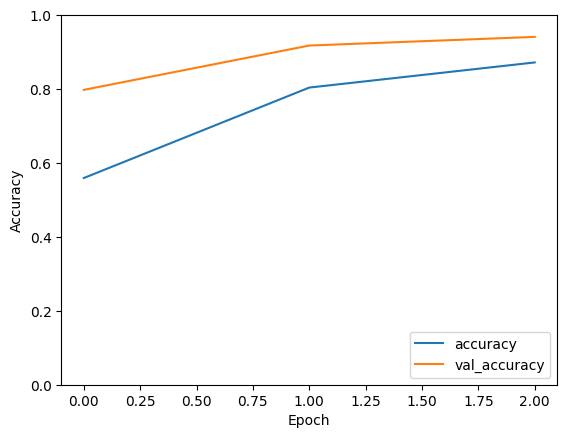

In [6]:
# Visualizing Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
images = cv2.imread('./9.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(images, (28, 28))
image = image.reshape(1, 28, 28, 1) / 255.0

In [8]:
output = model.predict(image)
print(output)
print(np.argmax(output))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
[[0.09758472 0.0045145  0.01211829 0.01321336 0.06888027 0.01893672
  0.0023319  0.26632702 0.07195187 0.44414127]]
9
